In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
import re

sms = pd.read_csv('E:/Conda/sms-spam/smsspamcollection/SMSSpamCollection', sep='\t', names=['label','message'])
# print sms size
print(sms.shape)

(5572, 2)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
sms.drop_duplicates(inplace=True)
sms.reset_index(drop=True, inplace=True)
print(sms.shape)

(5169, 2)


e:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


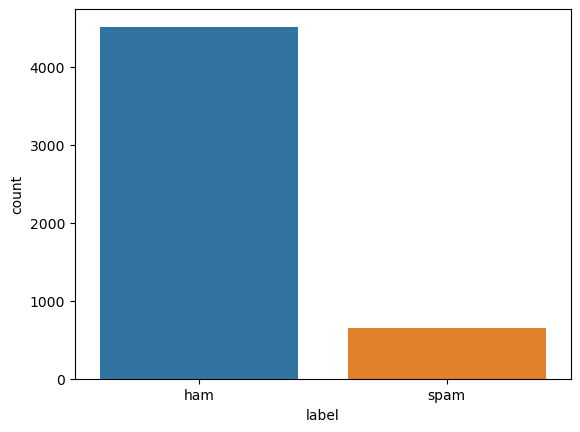

In [4]:
sms.label.value_counts()
sns.countplot(sms['label'])
plt.show()

In [5]:
import wordcloud

# Make a word cloud
data_ham  = sms[sms['label'] == 'ham'].copy()
data_spam = sms[sms['label'] == 'spam'].copy()

def show_wordcloud(df, title):
    text = ' '.join(df['message'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='lightgrey',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=20 )
    plt.show()


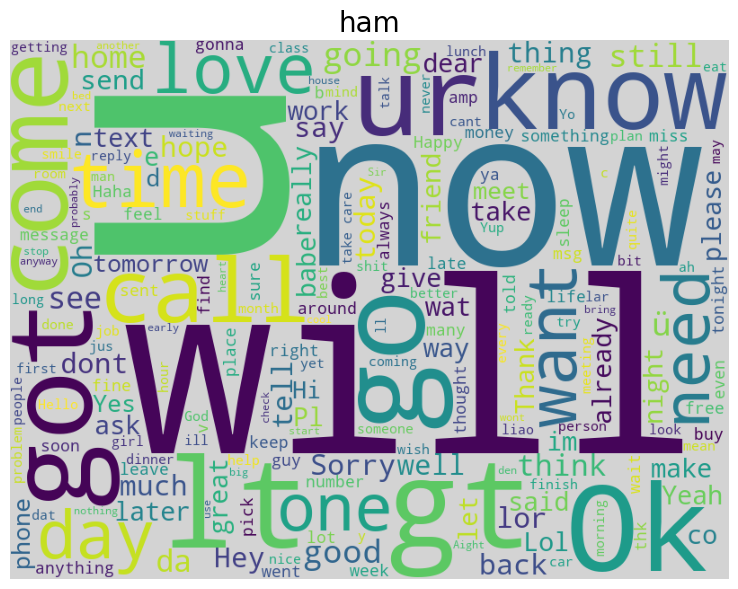

In [6]:
# ham word cloud
show_wordcloud(data_ham, "ham")

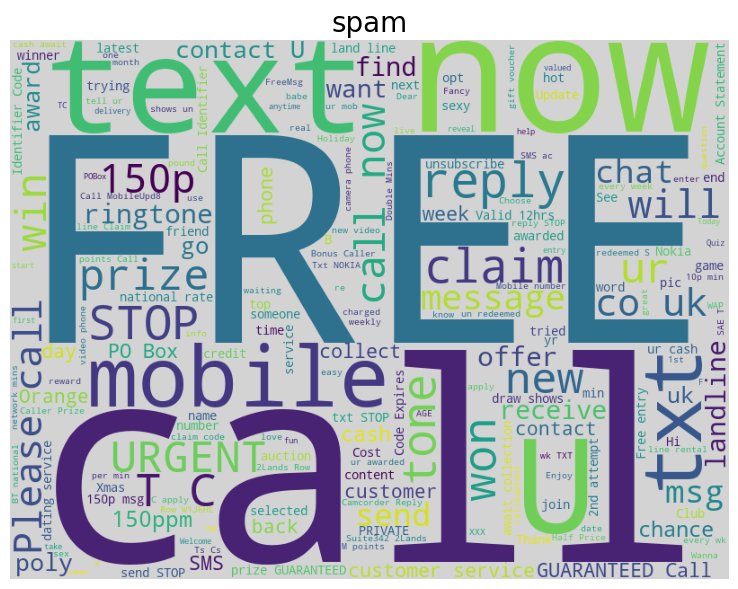

In [8]:
# spam word cloud
show_wordcloud(data_spam, "spam")

In [7]:
# Preprocessing the text data
corpus = []
ps = PorterStemmer()

for i in range(0,sms.shape[0]):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms.message[i]) #Cleaning special character from the message
    message = message.lower() #Converting the entire message into lower case
    words = message.split() # Tokenizing the review by words
    words = [word for word in words if word not in set(stopwords.words('english'))] #Removing the stop words
    words = [ps.stem(word) for word in words] #Stemming the words
    message = ' '.join(words) #Joining the stemmed words
    corpus.append(message) #Building a corpus of messages

print(corpus[0:10])

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat', 'ok lar joke wif u oni', 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli', 'u dun say earli hor u c alreadi say', 'nah think goe usf live around though', 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv', 'even brother like speak treat like aid patent', 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun', 'winner valu network custom select receivea prize reward claim call claim code kl valid hour', 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']


In [9]:
# Convert the preprocessed text data into a feature matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

# Convert the labels into binary values
y = pd.get_dummies(sms['label'])
y = y.iloc[:, 1].values

In [10]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [11]:
import tensorflow as tf

# Define the model architecture
classifier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
classifier.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
classifier.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test)) 

y_pred = classifier.predict(X_test)

Epoch 1/10
130/130 [==============================] - 2s 8ms/step - loss: 0.3502 - accuracy: 0.9137 - val_loss: 0.1321 - val_accuracy: 0.9700
Epoch 2/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0852 - accuracy: 0.9838 - val_loss: 0.0708 - val_accuracy: 0.9787
Epoch 3/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0452 - accuracy: 0.9891 - val_loss: 0.0602 - val_accuracy: 0.9807
Epoch 4/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0304 - accuracy: 0.9927 - val_loss: 0.0575 - val_accuracy: 0.9845
Epoch 5/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.0579 - val_accuracy: 0.9826
Epoch 6/10
130/130 [==============================] - 1s 7ms/step - loss: 0.0154 - accuracy: 0.9961 - val_loss: 0.0591 - val_accuracy: 0.9836
Epoch 7/10
130/130 [==============================] - 1s 8ms/step - loss: 0.0121 - accuracy: 0.9971 - val_loss: 0.0614 - val_accuracy: 0.9845
Epoch 

In [12]:
# calculate the accuracy score
from sklearn.metrics import accuracy_score

acc_s = accuracy_score(y_test, y_pred.round())*100
print("Accuracy Score {} %".format(round(acc_s,2)))


Accuracy Score 98.45 %


In [13]:
def predict_spam(sample_message):
    sample_message = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_message)
    sample_message = sample_message.lower()
    sample_message_words = sample_message.split()
    sample_message_words = [word for word in sample_message_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_message = [ps.stem(word) for word in sample_message_words]
    final_message = ' '.join(final_message)
    temp = cv.transform([final_message]).toarray()
    return classifier.predict(temp)

In [15]:
import numpy as np

print(np.round(predict_spam("&%&*#Q&#(%&) free money if you click the links: https://www.google.com/")).astype(int))

1/1 [==============================] - 0s 18ms/step
[[1]]
